<a href="https://colab.research.google.com/github/Nyounggu/Basic_ML_DL/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0%2B%EB%94%A5%EB%9F%AC%EB%8B%9D_CHAP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 다양한 분류 알고리즘

## 데이터 준비

In [ ]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
# Species 열에서 고유한 값 추출하기
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
# Species 열을 타깃으로 선정하고 나머지 5개 열은 입력 데이터로 사용
fish_target = fish['Species'].to_numpy()
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
# to_numpy() 메서드를 이용하여 넘파이 배열로 바꿈
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [ ]:

# train set과 test set으로 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

# StandarScaler 클래스를 사용해 train set과 test set를 표준화 전처리하기
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

##다중 분류(multi-class classification)
target data에 2개 이상의 클래스가 포함된 문제

### k-최근접 이웃 분류기의 확률 예측

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors = 3) # 최근접 이웃 개수 k = 3
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [ ]:
# target값을 그대로 사이킷런 모델에 전달하면 순서가 자동으로 알파벳 순서로 매겨짐
# 그렇게 되면 pd.unique(fish['Species'])로 출력했던 순서와 다름
# KNeighborsClassifier에서 정렬된 타킷값은 classes_ 속성에 저장되어 있음

print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
# predict() 메서드는 타깃값으로 예측을 출력
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [ ]:
import numpy as np

# predict_proba() : 각 클래스에 대한 확률
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4)) # 소수점 4번째 자리까지 표기

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


-> predict_proba()메서드는 출력 순서는 앞서 보았던 classes_ 속성과 같다.

-> 즉, 첫 번째 열이 'Bream'에 대한 확률, 두 번째 열이 'Parkki'에 대한 확률이다

In [ ]:
# kneighbors() 메서드는 입력은 2차원 배열이어야 함
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


-> 이 샘플의 이웃은 5번째 클래스인 'Roach'가 1개이고 3번째 클래스인 'Perch'가 2개이다.

-> 따라서 5번째 클래스에 대한 확률은 1/3 = 0.3333이고 3번째 클래스에 대한 확률은 2/3 = 0.6667 이다.

## 로지스틱 회귀 (logistic regression)
- 선형방정식을 사용한 분류 알고리즘으로 선형회귀와 달리 시그모이드 함수나 소프트맥스 함수를 사용하여 클래스 확률을 출력

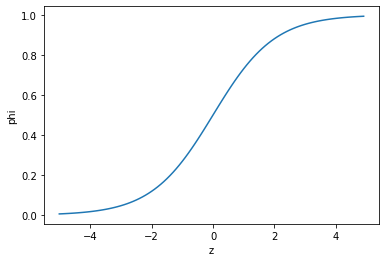

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -5부터 4까지 0.1씩 증가하는 배열을 생성
z = np.arange(-5, 5, 0.1)
# numpy.exp() : 밑이 자연상수 e인 지수함수 (e^x)로 변환해줌
# phi = 시그모이드 함수를 이용한 값
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

### 시그모이드 함수 (sigmoid function)

시그모이드 함수 또는 로지스틱 함수라고 부르며 선형 방정식의 출력을 0과 1사이의 값으로 압축하며 이진 분류를 위해 사용.

이진 분류일 경우 시그모이드 함수의 출력이 [0.5보다 크면 양성 클래스], [0.5보다 작으면 음성 클래스]로 판단

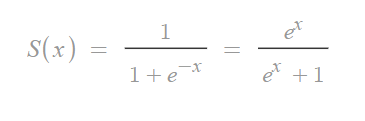

###  불리언 인덱싱 (boolean indexing)

넘파이 배열은 True, False 값을 전달하여 행을 선택할 수 있는 것

In [ ]:
# 넘파이 배열에 True 인 값을 리턴
char_arr = np.array(['A','B','C','D','E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


### 로지스틱 회귀로 이진분류 수행하기

In [ ]:
# train set에서 도미(Bream)와 빙어(Smelt)의 행만 골라내기
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [ ]:
# 로지스틱 회귀 모델 훈련하기
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [ ]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [ ]:
# 첫 번째 열 = 음성 클래스(0)에 대한 확률, 두 번째 열 = 양성 클래스(1)에 대한 확률
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [ ]:
print(lr.classes_) # 도미 = 음성(0), 빙어 = 양성(1)

['Bream' 'Smelt']


In [ ]:
# 로지스틱 회귀가 학습한 계수
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


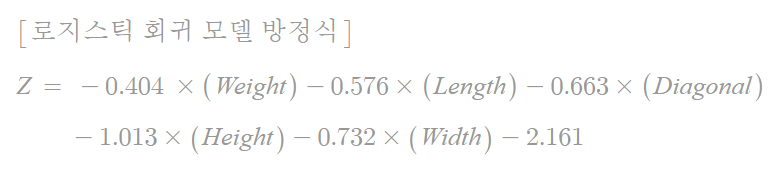

In [ ]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [ ]:
from scipy.special import expit

print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


-> predict_proba() 메서드 출력의 두 번째 열의 값과 동일

-> 즉, decision_function() 메서드는 양성 클래스에 대한 z값을 반환함

### 로지스틱 회귀로 다중분류 수행하기

In [ ]:
lr = LogisticRegression(C = 20, max_iter=1000) # 규제 제거 = 20, 반복 횟수 = 1000
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


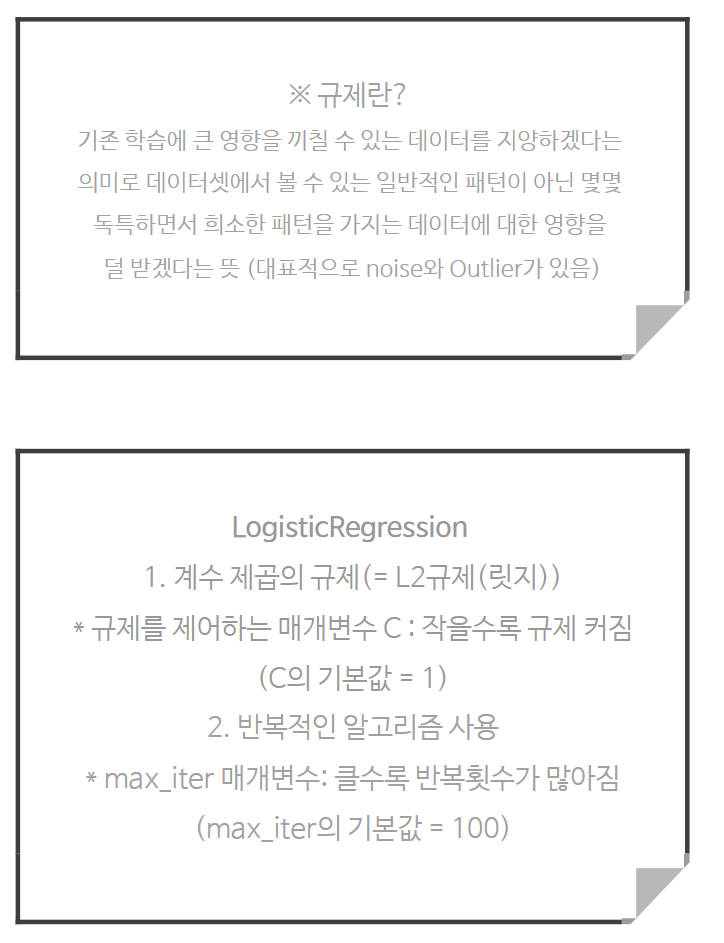

In [ ]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [ ]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
# 다중 분류일 경우 선형방정식 -> coef_와 intercept_의 크기 출력
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


### 소프트맥스 함수 (softmax function)
여러 개의 선형 방정식의 출력값을 0~1사이로 압축하고 전체 합이 1이 되도록 만들며 이를 위해 지수 함수를 사용하기 때문에 정규화된 지수 함수라고도 함

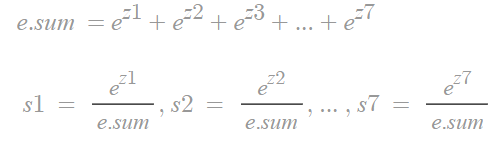

In [ ]:
# 이진 분류처럼 decision_funtion() 메서드로 z1 ~ z7까지 구한 다음
# 소프트맥스 함수를 사용해 확률로 바꾸기

decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals = 2)) 

# 넘파이 round() 함수는 기본으로 소수점 첫째 자리에서 반올림
# decimals 반올림 매개변수 -> 소수점 아래 자릿수를 지정할 수 있음

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [ ]:
from scipy.special import softmax

proba = softmax(decision, axis = 1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


## 확률적 경사하강법

점진적 학습 알고리즘 중 하나로 train set에서 랜덤하게 하나의 샘플을 선택하여 손실 함수의 경사를 따라 최적의 모델을 찾는 알고리즘

#### 에포크 (epoch)
확률적 경사 하강법에서 train set를 한 번 모두 사용하는 과정

image.png

###미니배치 경사 하강법

1개가 아닌 여러 개의 샘플을 사용해 경사 하강법을 수행하는 방법으로 실전에서 많이 사용함

###배치 경사 하강법(batch gradient descent)

한 번에 전체 샘플을 사용하는 방법으로 전체 데이터를 사용하므로 가장 안정적인 방법이지만 그만큼 컴퓨터 자원을 많이 사용함. 또한 어떤 경우는 데이터가 너무 많아 한 번에 전체 데이터를 모두 처리할 수 없을지도 모름

###손실 함수(loss function)

어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지를 측정하는 기준

### 로지스틱 손실 함수 (logistic loss function)

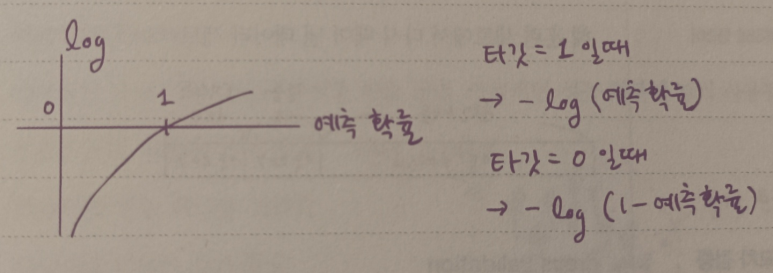

=> 양성 클래스(타깃 = 1)일 때 손실은 -log(예측확률)로 계산하며, 1 확률이 1에서 멀어질수록 손실 아주 큰 양수가 됨. 음성 클래스(타깃 = 0)일 때 손실은 -log(1-예측확률)로 계산함. 이 예측 확률이 0에서 멀어질수록 손실은 아주 큰 양수가 됨. 

###크로스엔트로피 손실 함수(cross-entropy loss function)

다중 분류에서 사용하는 손실 함수

### 확률적 경사 하강법

#### SGDClassifier

In [ ]:
import pandas as pd
fish = pd.read_csv('http://bit.ly/fish_csv_data')

In [ ]:
# Species 열을 제외한 나머지 5개는 입력데이터로 사용 Species 열은 타깃 데이터
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

# train set과 test set로 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

# StandarScaler 클래스를 사용해 train set과 test set를 표준화 전처리하기
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
# 사이킷런에서 확률적 경사 하강법을 제공하는 대표적인 분류용 클래스 SGDClassifier
from sklearn.linear_model import SGDClassifier

# 사이킷런 1.1.0 버전 이하일 경우 'log_loss'를 'log'로 바꾸어 주세요
# max_iter(에포크 횟수 : 10)

sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [ ]:
# 모델을 이어서 훈련할 때 partial_fit() 메서드 사용
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


#### 에포크와 과대/과소적합

In [ ]:
import numpy as np

sc = SGDClassifier(loss = 'log', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [ ]:
print(classes)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


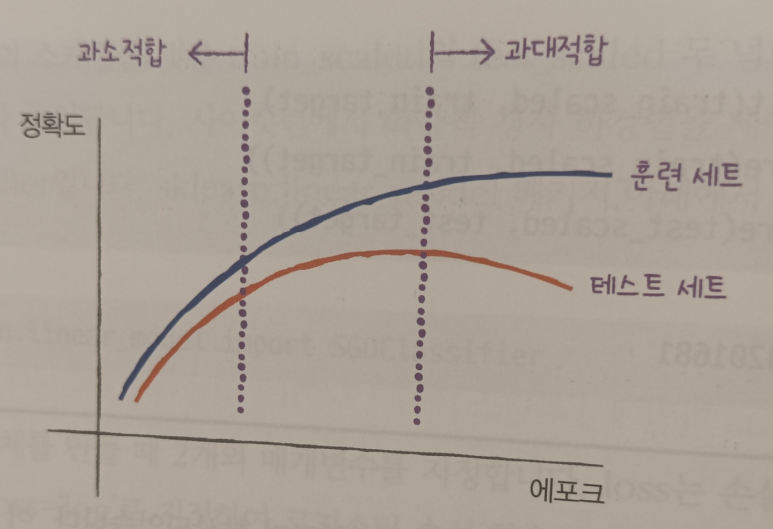

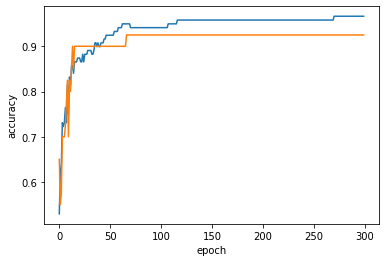

In [ ]:
# 300번의 에포크 동안 훈련을 반복하여 진행
for _ in range(0,300) :
  sc.partial_fit(train_scaled, train_target, classes=classes)

  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

# 그래프 그리기
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

=> 100번째 에포크 이후에는 train set과 test set의 점수가 조금씩 벌어지고 있고 에포크 초기에는 과소적합되어 train set과 test set의 점수가 낮다. 

∴ 100번째 에포크가 적절한 반복 횟수

In [ ]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


힌지 손실(hinge loss)

SVM이라 불리는 또 다른 머신러닝 알고리즘을 위한 손실 함수로 널리 사용하는 머신러닝 알고리즘 중 하나.

SGDClassifier가 여러 종류의 손실 함수를 loss 매개변수에 지정하여 다양한 머신러닝 알고리즘을 지원함

In [ ]:
# 힌지 손실

sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
